**Introduction**

This is a classification project that aims for predicting credit risk or in simpler terms will help the companies to predict bad loans. Predicting the credibility of a loan is very useful in the Banking business. Using machine learning will help to decide, whether to approve a loan or not by accounting for the risk value based on historical data.


In [108]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

# **Data Analysis**

In [109]:
data = pd.read_csv('german_credit_data.csv')

In [110]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [112]:
print(data.dtypes.to_markdown())

|                  | 0      |
|:-----------------|:-------|
| Unnamed: 0       | int64  |
| Age              | int64  |
| Sex              | object |
| Job              | int64  |
| Housing          | object |
| Saving accounts  | object |
| Checking account | object |
| Credit amount    | int64  |
| Duration         | int64  |
| Purpose          | object |
| Risk             | object |


In [113]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Unnamed: 0       |   0 |
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  | 183 |
| Checking account | 394 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


In [117]:
cat_columns = data.dtypes[data.dtypes == object]
cat_columns = cat_columns.index.tolist()

# Output the list of categorical columns
print(cat_columns)


['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


In [121]:
num_columns = data.dtypes[data.dtypes==np.int64]
num_columns = num_columns.index.tolist()
#num_columns

print(num_columns)

['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration']


In [122]:
print(data['Risk'].value_counts().to_markdown())

| Risk   |   count |
|:-------|--------:|
| good   |     700 |
| bad    |     300 |


<Figure size 500x500 with 0 Axes>

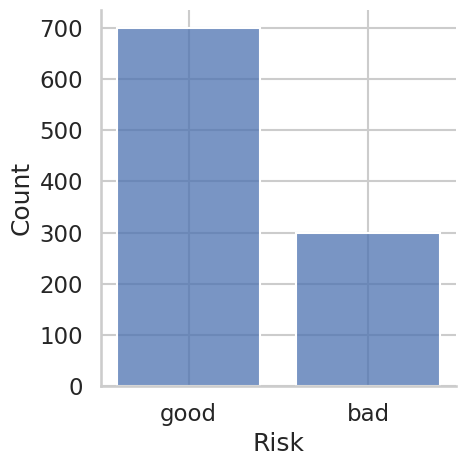

In [123]:
sns.set_context('talk')
plt.figure(figsize=(5,5))
sns.displot(data,x="Risk",multiple="dodge",shrink=0.8);

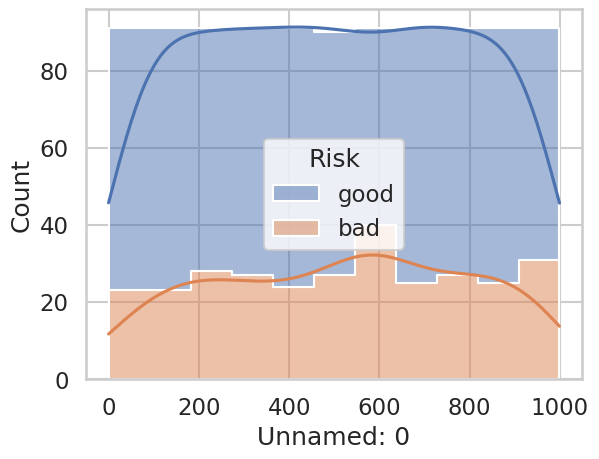

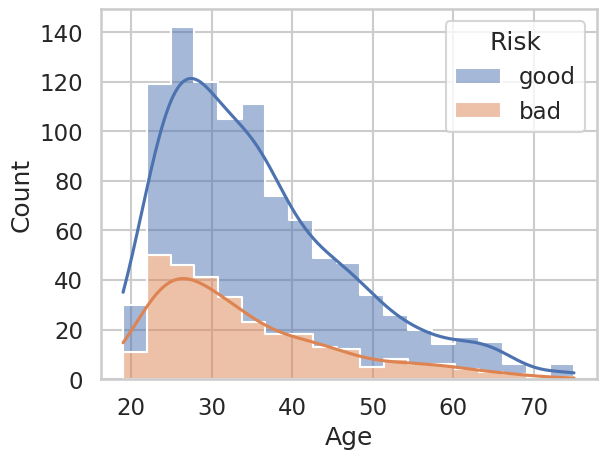

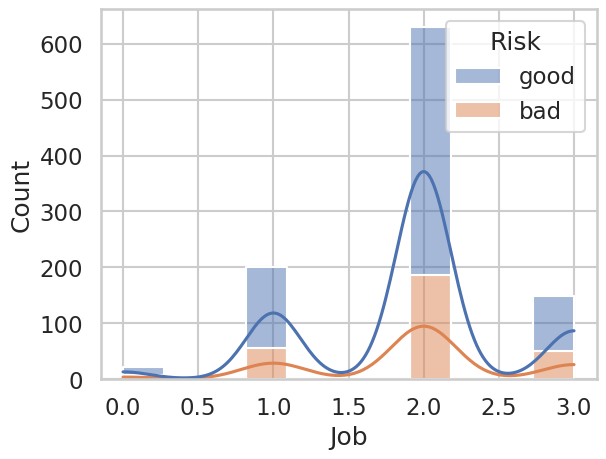

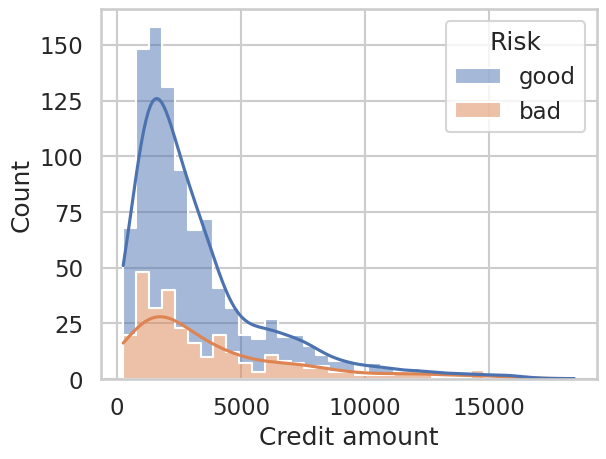

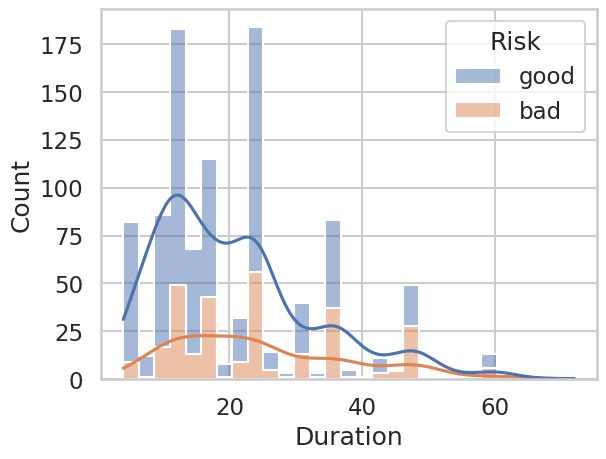

In [124]:
for i,col in enumerate(num_columns):
    plt.figure(i)
    sns.histplot(data, x=col, kde=True, hue="Risk",multiple="stack",element="step");

The distribution of these columns are looks similar for both risk value. The distributions are not normal, they are right-skewed, so we will have to do log transformations on these distributions. Also, we can note that the job column looks like it has a categorical value, not continuous values. So we can include this column too in the categorical category.

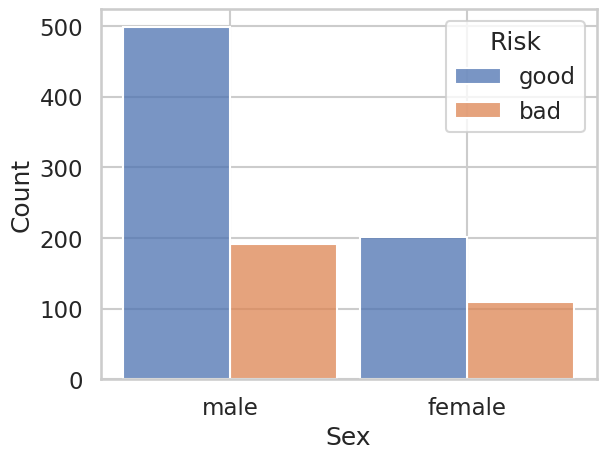

In [125]:
%matplotlib inline

sns.histplot(data,x="Sex",hue="Risk",shrink=0.9,multiple='dodge');

In [126]:
def propotion_of_Risk(column):
    Good_loan=data[data["Risk"]=="good"][column].value_counts()
    Bad_loan=data[data["Risk"]=="bad"][column].value_counts()
    propotion=(Bad_loan/Good_loan).sort_values(ascending=False)
    return propotion

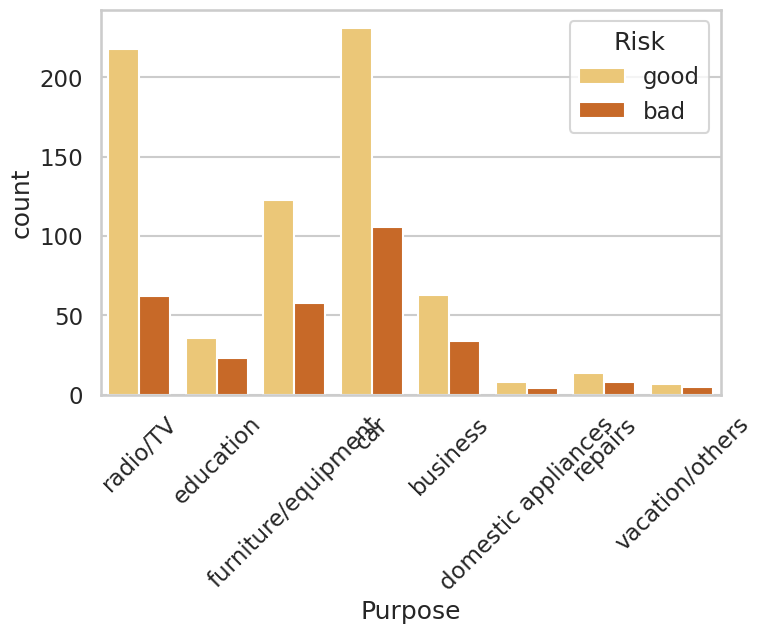

In [143]:
plt.figure(figsize=(8,5))
sns.countplot(x="Purpose", data=data,
              palette="YlOrBr", hue = "Risk");
plt.xticks(rotation=45);

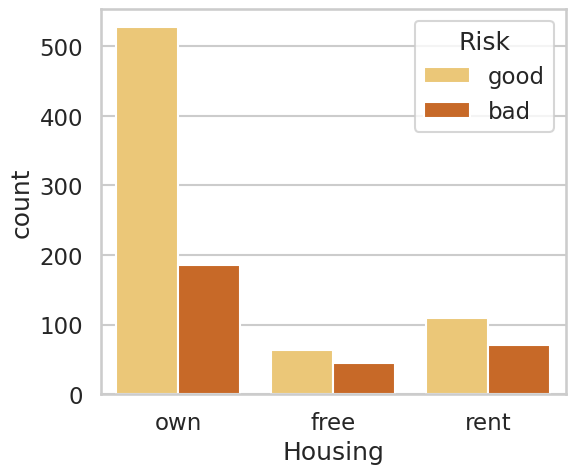

In [144]:
plt.figure(figsize=(6,5))
sns.countplot(x="Housing", data=data,
              palette="YlOrBr", hue = "Risk");

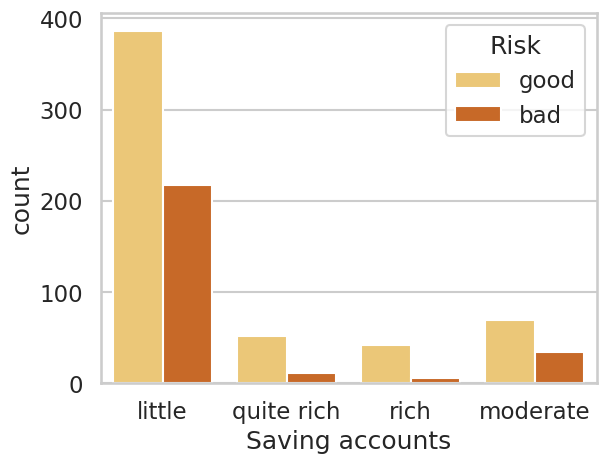

In [142]:
sns.countplot(x="Saving accounts", data=data,
              palette="YlOrBr", hue = "Risk");

In [130]:
print(propotion_of_Risk("Purpose").to_markdown())

| Purpose             |    count |
|:--------------------|---------:|
| vacation/others     | 0.714286 |
| education           | 0.638889 |
| repairs             | 0.571429 |
| business            | 0.539683 |
| domestic appliances | 0.5      |
| furniture/equipment | 0.471545 |
| car                 | 0.458874 |
| radio/TV            | 0.284404 |


In [131]:
print(propotion_of_Risk("Housing").to_markdown())

| Housing   |    count |
|:----------|---------:|
| free      | 0.6875   |
| rent      | 0.642202 |
| own       | 0.352941 |


In [132]:
print(propotion_of_Risk("Saving accounts").to_markdown())

| Saving accounts   |    count |
|:------------------|---------:|
| little            | 0.562176 |
| moderate          | 0.492754 |
| quite rich        | 0.211538 |
| rich              | 0.142857 |


# **Preprocessing and features selection**

**Data Cleaning**

In [145]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Unnamed: 0       |   0 |
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  | 183 |
| Checking account | 394 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


In [146]:
data["Saving accounts"].fillna(data['Saving accounts'].mode()[0], inplace=True)
data["Checking account"].fillna(data['Checking account'].mode()[0], inplace=True)

In [147]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Unnamed: 0       |   0 |
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  |   0 |
| Checking account |   0 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


**Identify Outliers**

Age : 23


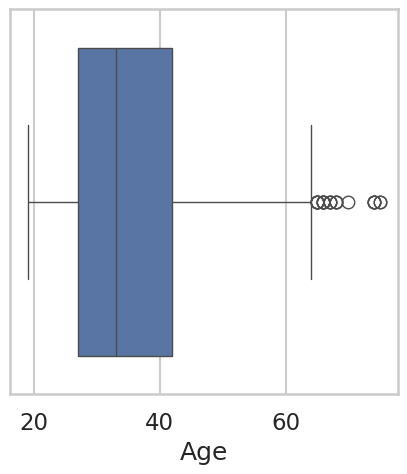

Credit amount : 72


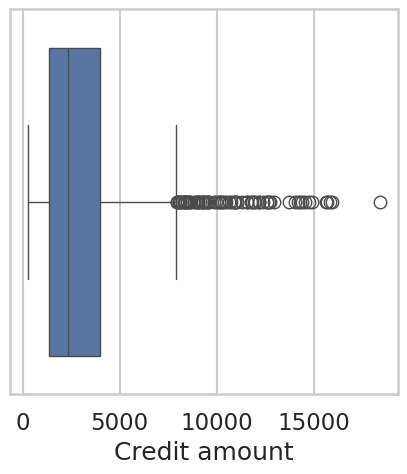

Duration : 70


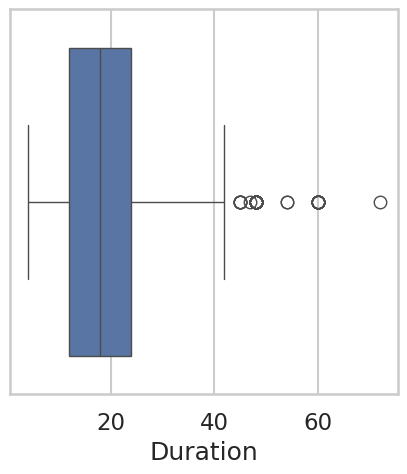

['Age', 'Credit amount', 'Duration']


In [148]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=True):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                plt.figure(figsize=(5,5))
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

#print(num_columns)
num_columns = ["Age","Credit amount","Duration"]
print(has_outliers(data, num_columns))

In [149]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_columns:
    replace_with_thresholds(data, col)

#has_outliers(data, num_columns)

**One Hot Encoding**

In [150]:
data = data.merge(pd.get_dummies(data.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
data = data.merge(pd.get_dummies(data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
data = data.merge(pd.get_dummies(data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
data = data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
#data = data.merge(pd.get_dummies(data.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
data = data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
#data = data.merge(pd.get_dummies(data["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [151]:
data.columns.to_list()

['Unnamed: 0',
 'Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk',
 'Purpose_car',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_furniture/equipment',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_vacation/others',
 'Sex_male',
 'Housing_own',
 'Housing_rent',
 'Savings_moderate',
 'Savings_quite rich',
 'Savings_rich',
 'Check_moderate',
 'Check_rich']

In [152]:
droplist=["Sex","Housing","Saving accounts","Checking account","Purpose"]

data.drop(droplist, axis= 1, inplace = True)

In [153]:
print(data.describe().T.to_markdown())

|               |   count |      mean |         std |   min |     25% |    50% |     75% |     max |
|:--------------|--------:|----------:|------------:|------:|--------:|-------:|--------:|--------:|
| Unnamed: 0    |    1000 |  499.5    |  288.819    |     0 |  249.75 |  499.5 |  749.25 |  999    |
| Age           |    1000 |   35.4535 |   11.1063   |    19 |   27    |   33   |   42    |   64.5  |
| Job           |    1000 |    1.904  |    0.653614 |     0 |    2    |    2   |    2    |    3    |
| Credit amount |    1000 | 3051.1    | 2187.14     |   250 | 1365.5  | 2319.5 | 3972.25 | 7882.38 |
| Duration      |    1000 |   20.307  |   10.6152   |     4 |   12    |   18   |   24    |   42    |


In [154]:
num_col = ["Credit amount","Duration","Age"]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in [num_col]:
    data[column] = mm.fit_transform(data[column])

In [155]:
print(data.describe().T.to_markdown())

|               |   count |       mean |        std |   min |        25% |        50% |        75% |   max |
|:--------------|--------:|-----------:|-----------:|------:|-----------:|-----------:|-----------:|------:|
| Unnamed: 0    |    1000 | 499.5      | 288.819    |     0 | 249.75     | 499.5      | 749.25     |   999 |
| Age           |    1000 |   0.361615 |   0.244095 |     0 |   0.175824 |   0.307692 |   0.505495 |     1 |
| Job           |    1000 |   1.904    |   0.653614 |     0 |   2        |   2        |   2        |     3 |
| Credit amount |    1000 |   0.367003 |   0.286561 |     0 |   0.146154 |   0.271148 |   0.487692 |     1 |
| Duration      |    1000 |   0.429132 |   0.279346 |     0 |   0.210526 |   0.368421 |   0.526316 |     1 |


**Correlation**

In [161]:
print(data["Risk"].head().to_markdown())

|    |   Risk |
|---:|-------:|
|  0 |      1 |
|  1 |      0 |
|  2 |      1 |
|  3 |      1 |
|  4 |      0 |


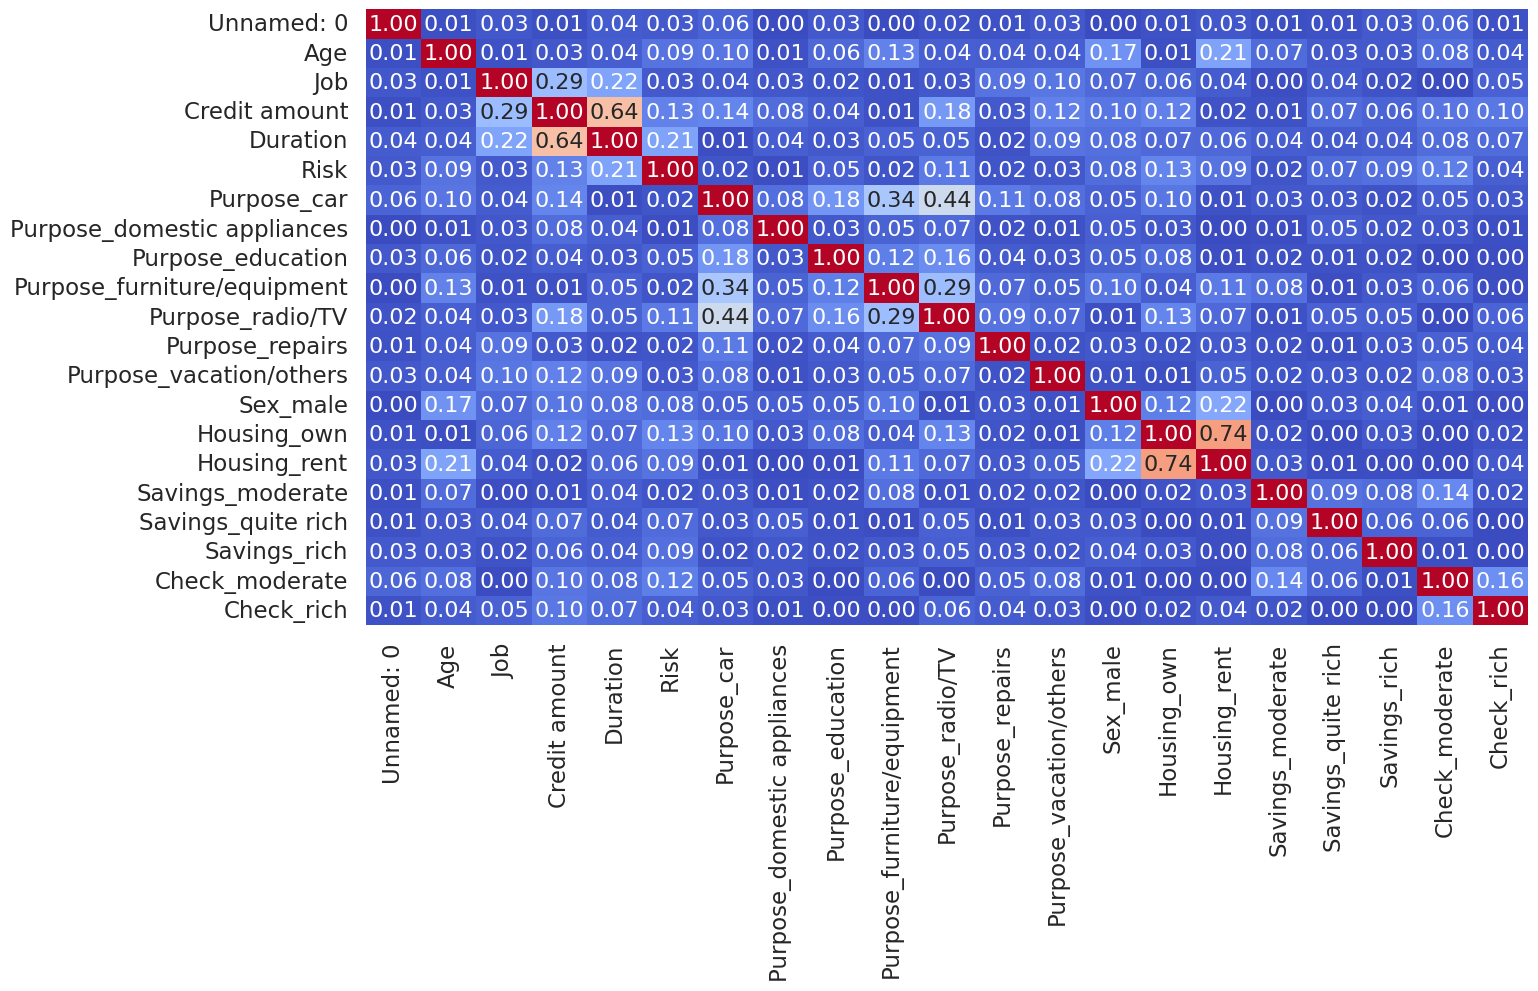

In [162]:
corr = data.corr()
corr

plt.figure(figsize=(15,8));
sns.heatmap(abs(corr),cmap='coolwarm',annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False);

In [160]:
print(data["Risk"].head().to_markdown())

|    |   Risk |
|---:|-------:|
|  0 |      1 |
|  1 |      0 |
|  2 |      1 |
|  3 |      1 |
|  4 |      0 |


# Data Modelling

After analysis and cleaning of the data, we will try to predict the risk of transactions utilizing machine learning classification algorithms. So in this section, we will apply some algorithm such as Logistic regression with and without regularization, Decision Tree, Random Forest, Gradient boosting and Stacking and accurately predicts whether a loan is good or bad.

In [163]:
feauture_cols = data.drop('Risk',axis=1).columns.to_list()
#feauture_cols

In [164]:
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feauture_cols], data.Risk))

# Create the dataframes
X_train = data.loc[train_idx, feauture_cols]
y_train = data.loc[train_idx, 'Risk']

X_test  = data.loc[test_idx, feauture_cols]
y_test  = data.loc[test_idx, 'Risk']

In [165]:
print(y_train.value_counts(normalize=True).to_markdown())

|   Risk |   proportion |
|-------:|-------------:|
|      1 |          0.7 |
|      0 |          0.3 |


**Logistic Regression**

The first model we are trying to predict the class is Logistic Regression. To prevent we will be using regularization in our model. We will try both Ridge(L2) and Lasso(L1) regularization and uses evaluation metrics to compare which regularization provides better accuracy.

In [180]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [181]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [182]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [183]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)
print("Predicted values:")
print(y_pred.head().to_markdown())

Predicted values:
|    |   lr |   l1 |   l2 |
|---:|-----:|-----:|-----:|
|  0 |    1 |    1 |    1 |
|  1 |    1 |    1 |    1 |
|  2 |    1 |    1 |    1 |
|  3 |    1 |    1 |    1 |
|  4 |    0 |    0 |    0 |


In [178]:
print("Prediction Probabilities:")
print(y_prob.head().to_markdown())

Prediction Probabilities:
|    |       lr |       l1 |       l2 |
|---:|---------:|---------:|---------:|
|  0 | 0.809553 | 0.789371 | 0.788526 |
|  1 | 0.728229 | 0.756174 | 0.729405 |
|  2 | 0.693731 | 0.729596 | 0.699076 |
|  3 | 0.741561 | 0.720701 | 0.721759 |
|  4 | 0.597615 | 0.582235 | 0.61784  |


In [184]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [185]:
print(metrics.to_markdown())

|           |       lr |       l1 |       l2 |
|:----------|---------:|---------:|---------:|
| precision | 0.686585 | 0.668148 | 0.661445 |
| recall    | 0.716667 | 0.706667 | 0.703333 |
| fscore    | 0.667945 | 0.651667 | 0.646108 |
| accuracy  | 0.716667 | 0.706667 | 0.703333 |
| auc       | 0.572222 | 0.555556 | 0.55     |


The table above with the metrics clearly shows the difference in the evaluation metrics for different models. the logical regression without any regularization produces better prediction comparatively. But overall the accuracies are not good, so we will try out different classification algorithms.

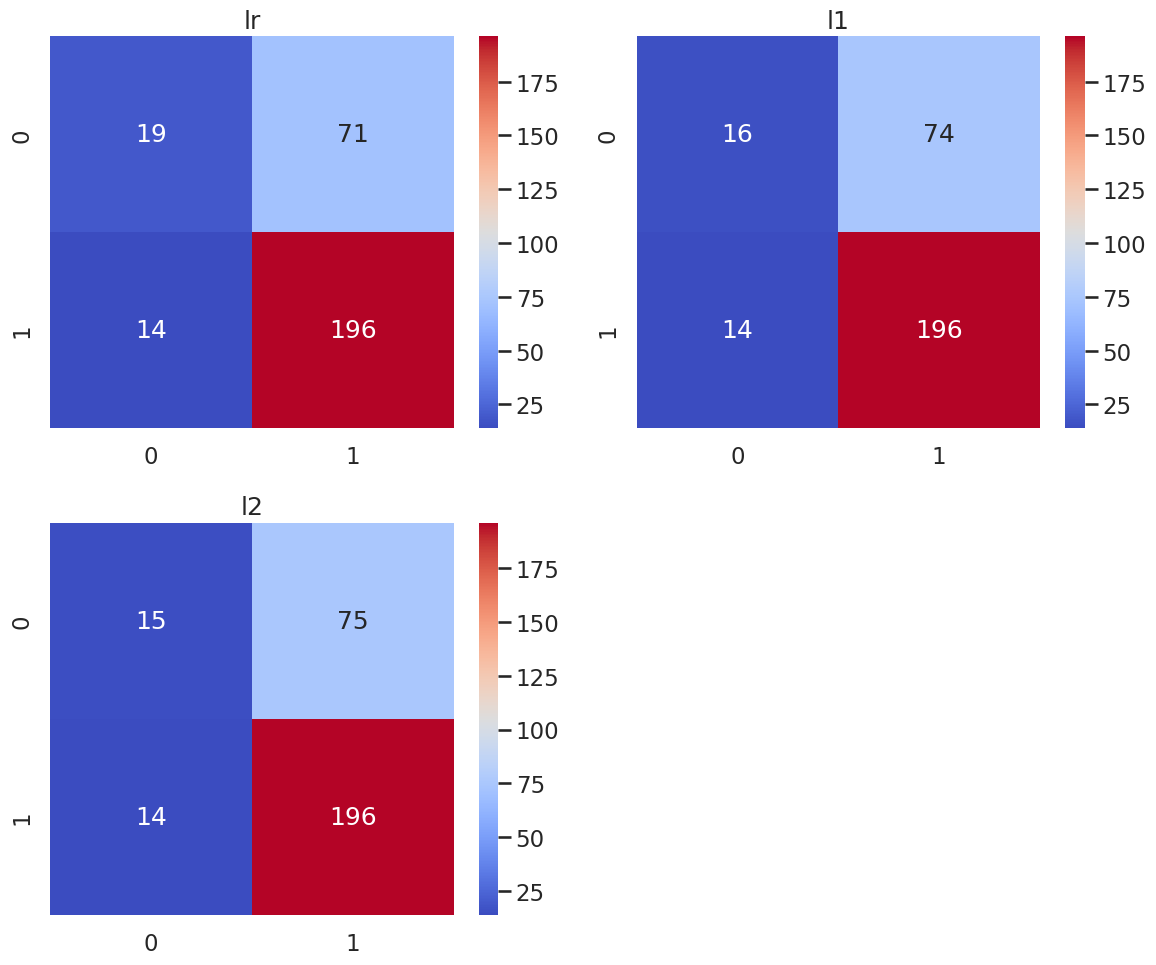

In [186]:

colors = 'coolwarm'

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);

plt.tight_layout()


**K Nearest Neighbors**

The next algorithm we are going to deploy is the K nearest neighbor. To find out the best k for the prediction, we use cross-validation with K from 1 to 40 and using the Elbow method to determine the best K. We use the same train and test dataset that we used for logistic regression.

In [192]:
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#print(f1_results)
#print(error_results)

<Figure size 300x300 with 0 Axes>

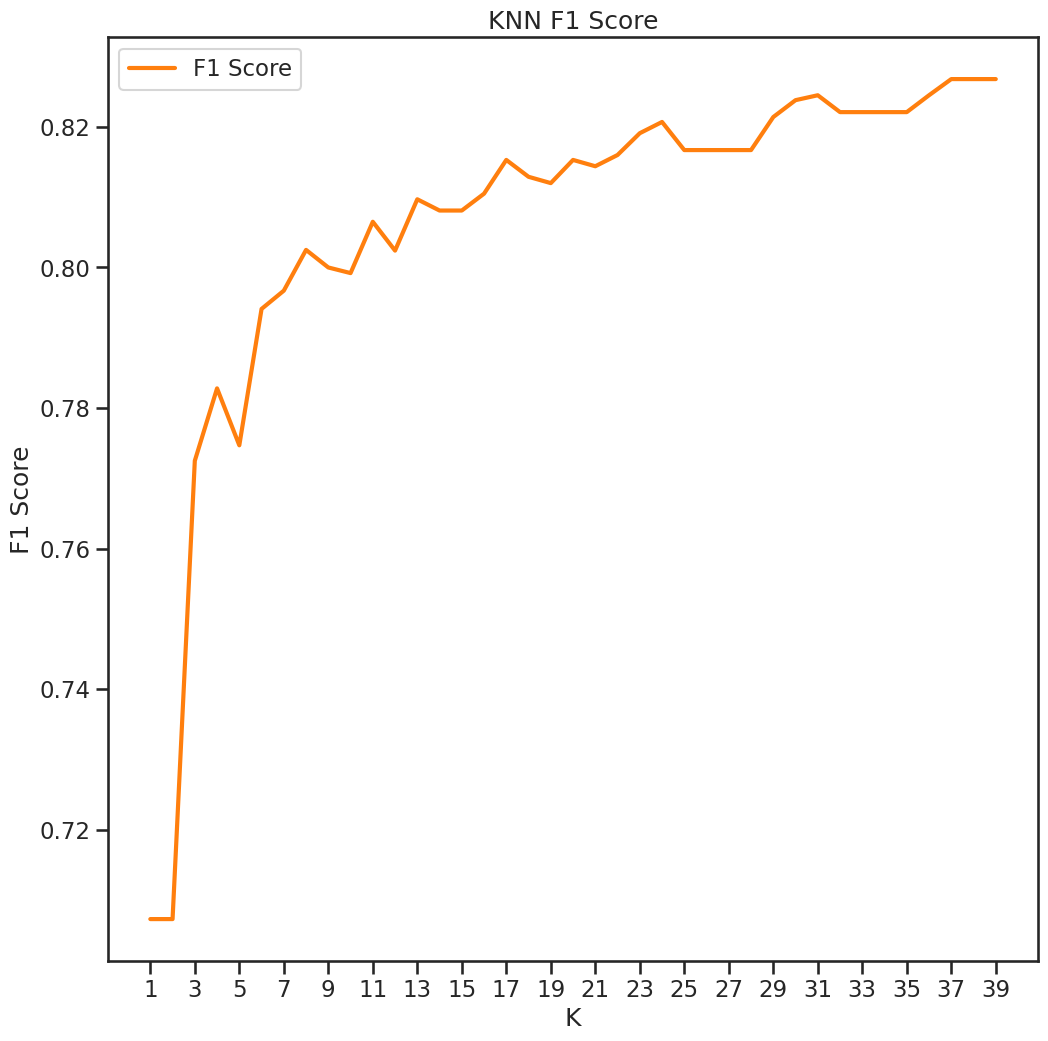

In [193]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(3,3))
ax = f1_results.set_index('K').plot(color=colors[1], figsize=(12, 12), linewidth=3)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2))

plt.title('KNN F1 Score')
plt.show()

<Figure size 300x300 with 0 Axes>

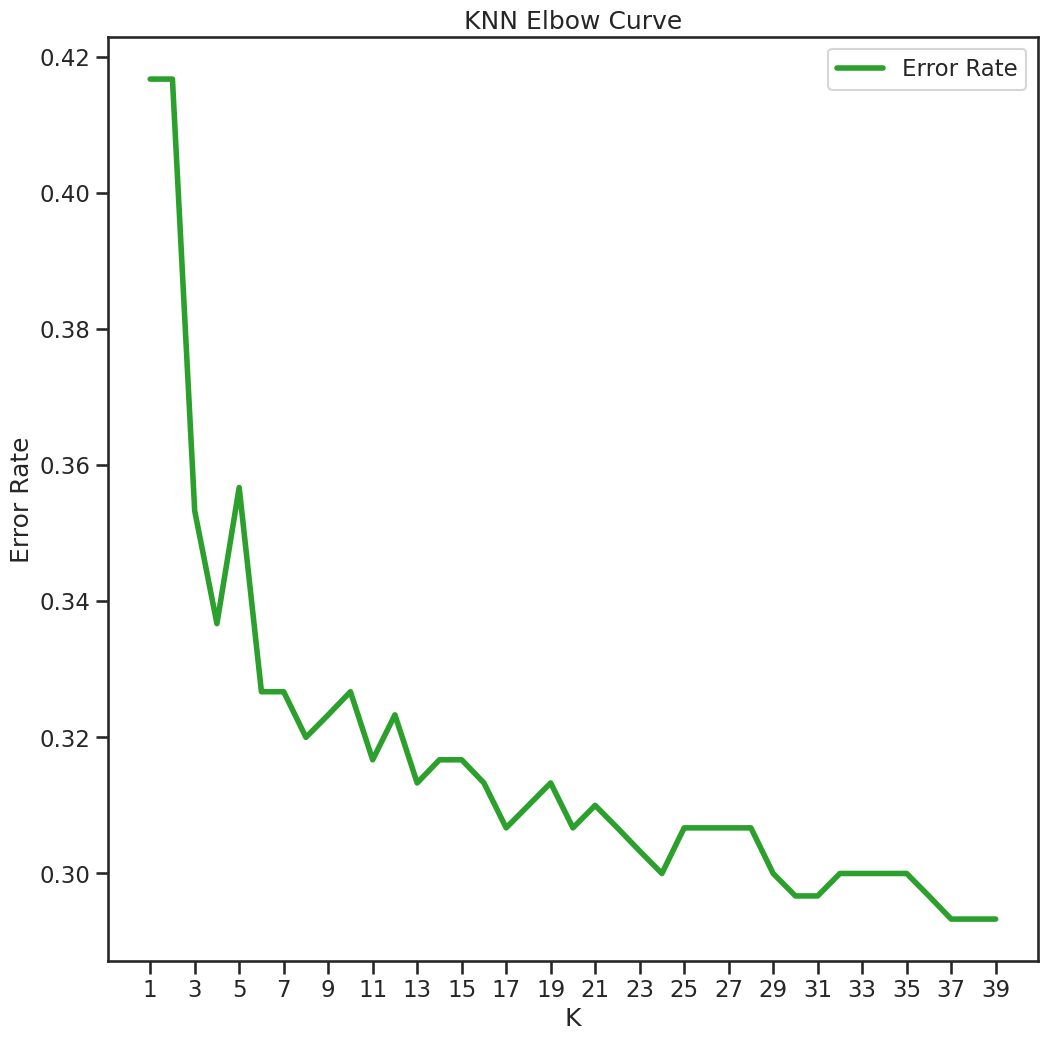

In [194]:
#sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(3,3));
ax = error_results.set_index('K').plot(color=colors[2], figsize=(12, 12), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve');

In [198]:
knn = KNeighborsClassifier(n_neighbors=32, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_KNN),
                         'precision': precision_score(y_test, y_pred_KNN),
                         'recall': recall_score(y_test, y_pred_KNN),
                         'f1': f1_score(y_test, y_pred_KNN),
                         'auc': roc_auc_score(y_test, y_pred_KNN)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        90
           1       0.70      1.00      0.83       210

    accuracy                           0.71       300
   macro avg       0.85      0.51      0.44       300
weighted avg       0.79      0.71      0.59       300

   accuracy  precision    recall        f1       auc
0       0.7   0.702703  0.990476  0.822134  0.506349


So the KNN algorithm predicted the loan value with 70% accuracy. The bad class with 67% precision and the good class with 72% precision. The recall of predicting bad class is very low, it is beacuse of the small size of the bad class data. Even though the accuracy we attained far better than the logistic regression, the accuracy is still not better.

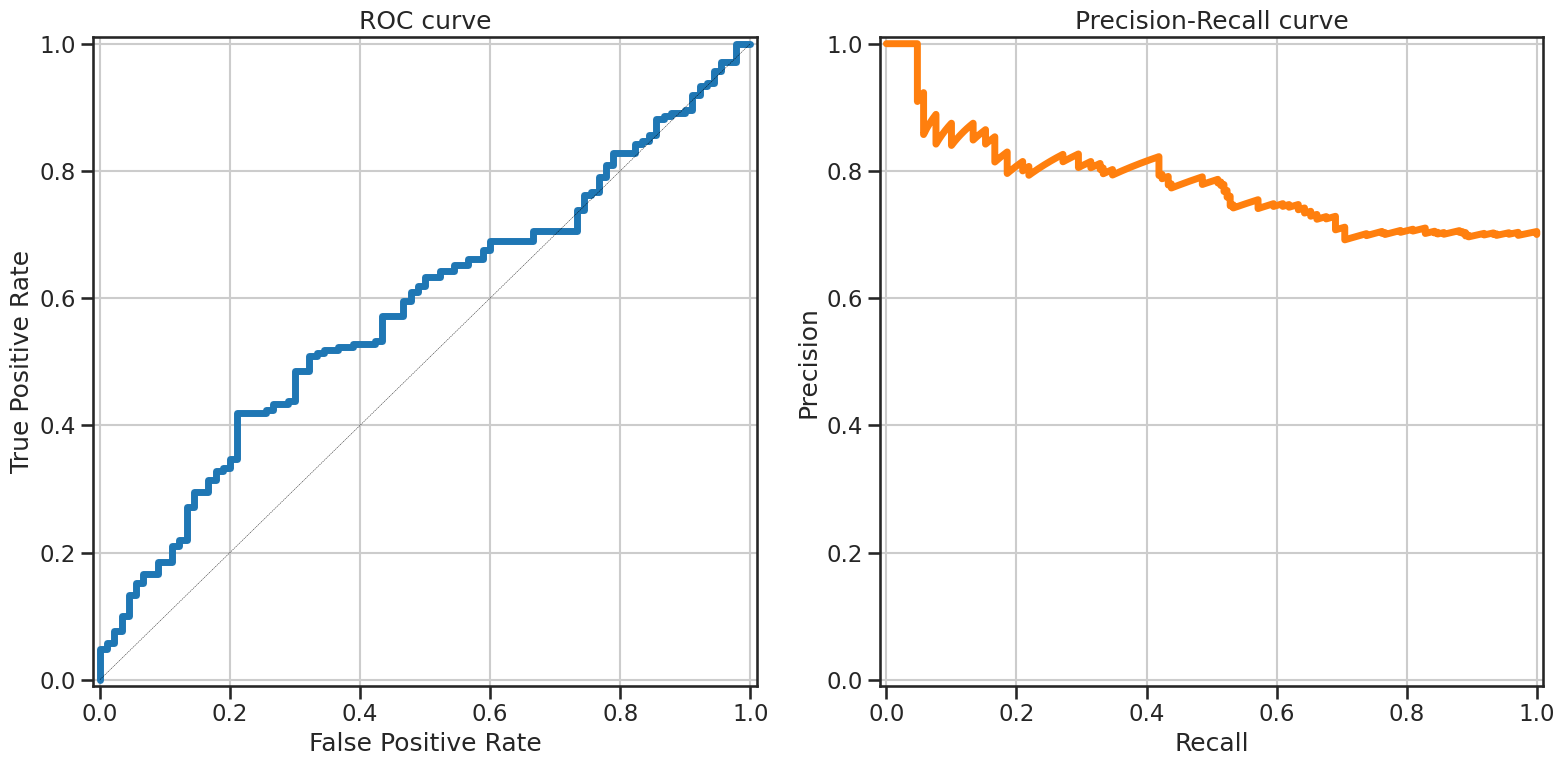

In [199]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob_KNN = knn.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_KNN[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob_KNN[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

**Random Forest**

The next algorithm we will be deploying is the Random Forest. Here we try the different number of trees and find out the best parameter with the out-of-bag error. We used tree numbers from 15 to 400 and plotted the out-of-bag error with the tree number.

In [200]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [201]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=False,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_

    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

print(rf_oob_df.to_markdown())

|   n_trees |      oob |
|----------:|---------:|
|        15 | 0.361429 |
|        20 | 0.332857 |
|        30 | 0.341429 |
|        40 | 0.335714 |
|        50 | 0.325714 |
|       100 | 0.315714 |
|       150 | 0.31     |
|       200 | 0.304286 |
|       300 | 0.3      |
|       400 | 0.302857 |


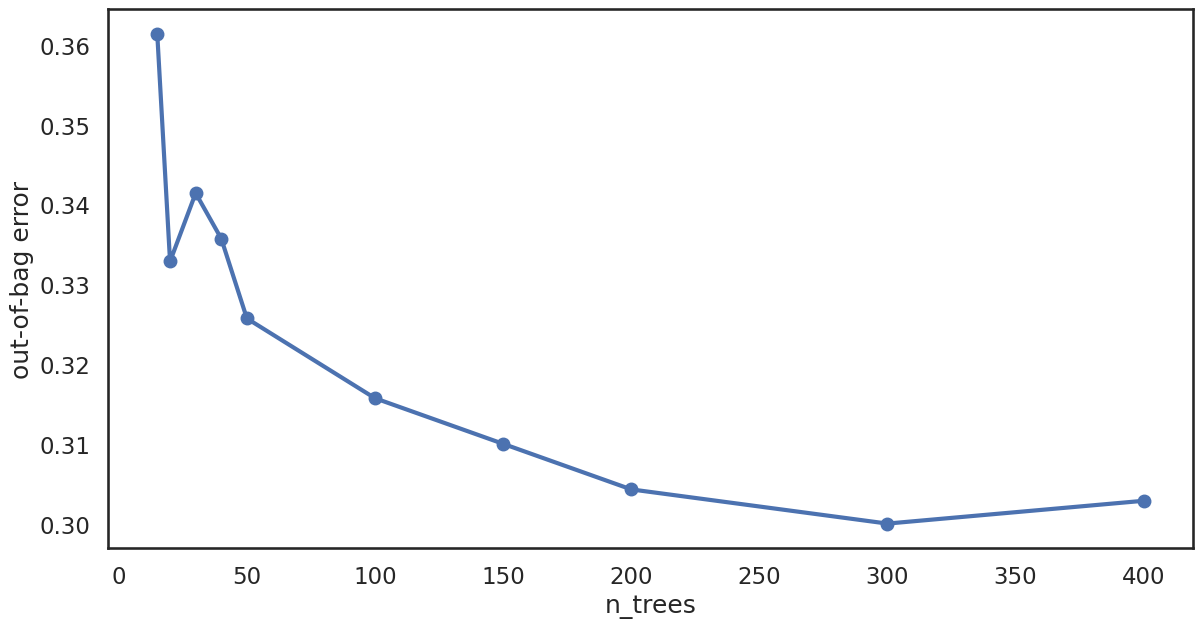

In [202]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=3)
ax.set(ylabel='out-of-bag error');

In [203]:
RF=RF.set_params(n_estimators=200)

y_pred_RF = RF.predict(X_test)

In [204]:
cr = classification_report(y_test, y_pred_RF)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_RF),
                         'precision': precision_score(y_test, y_pred_RF),
                         'recall': recall_score(y_test, y_pred_RF),
                         'f1': f1_score(y_test, y_pred_RF),
                         'auc': roc_auc_score(y_test, y_pred_RF)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.55      0.24      0.34        90
           1       0.74      0.91      0.82       210

    accuracy                           0.71       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.68      0.71      0.67       300

   accuracy  precision    recall        f1       auc
0  0.713333   0.738462  0.914286  0.817021  0.579365


In [205]:
cr = classification_report(y_test, y_pred_RF)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_RF),
                         'precision': precision_score(y_test, y_pred_RF),
                         'recall': recall_score(y_test, y_pred_RF),
                         'f1': f1_score(y_test, y_pred_RF),
                         'auc': roc_auc_score(y_test, y_pred_RF)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.55      0.24      0.34        90
           1       0.74      0.91      0.82       210

    accuracy                           0.71       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.68      0.71      0.67       300

   accuracy  precision    recall        f1       auc
0  0.713333   0.738462  0.914286  0.817021  0.579365


Text(0.5, 42.083333333333314, 'Ground Truth')

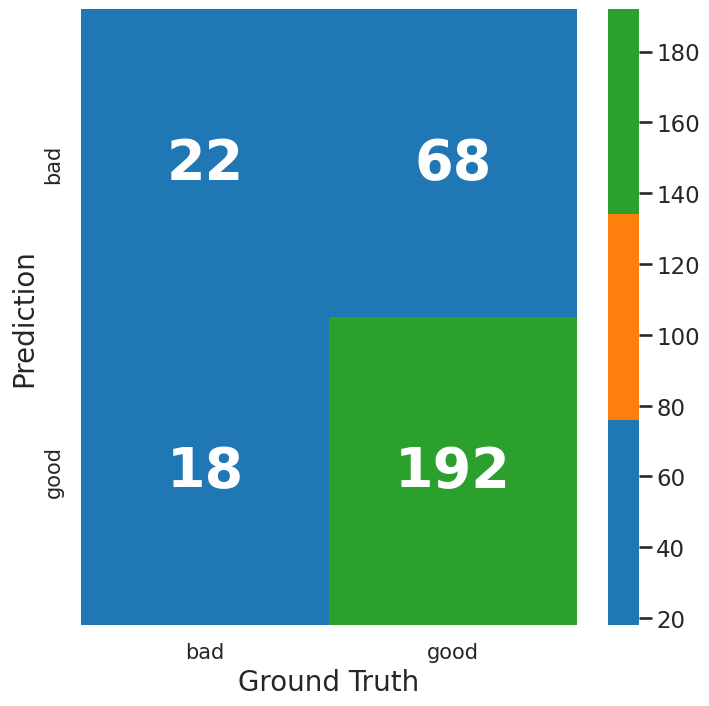

In [206]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_RF)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['bad', 'good']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)

In [209]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #accuracy     = accuracy_score(testing_y,predictions)
    accuracy     = accuracy_score(testing_y, predictions)
    precision    = precision_score(testing_y, predictions)
    recall       = recall_score(testing_y, predictions)
    f1           = f1_score(testing_y, predictions)
    auc          = roc_auc_score(testing_y, predictions)
    df = pd.DataFrame({"Model"               : [name],
                       "Accuracy Score"      : [accuracy],
                       "Precision Score"     : [precision],
                       "Recall Score"        : [recall],
                       "F1 score"            : [f1],
                       "AUC Score"           : [auc]

                      })
    return df

model1 = model_report(lr,X_train,X_test,y_train,y_test,
                      "Linear Regression")
model2 = model_report(lr_l1,X_train,X_test,y_train,y_test,
                      "Linear Regression l1")
model3 = model_report(lr_l2,X_train,X_test,y_train,y_test,
                      "Linear Regression l2")

model4 = model_report(knn,X_train,X_test,y_train,y_test,
                      "KNN")

model5 = model_report(RF,X_train,X_test,y_train,y_test,
                      "Random Forest")



model_performances = pd.concat([model1,model2,model3,model4,model5],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [210]:
model_performances

,Model,Accuracy Score,Precision Score,Recall Score,F1 score,AUC Score
0,Linear Regression,0.716667,0.734082,0.933333,0.821803,0.572222
1,Linear Regression l1,0.703333,0.723247,0.933333,0.814969,0.550000
2,Linear Regression l2,0.703333,0.723247,0.933333,0.814969,0.550000
3,KNN,0.700000,0.702703,0.990476,0.822134,0.506349
4,Random Forest,0.700000,0.727273,0.914286,0.810127,0.557143


All these models couldn't predict the Risk factor of the Bank loan, with an accuracy above 75%. In a real-world case, an accurate prediction of at least 80% will be useful. This reduction of accuracy is coming from the imbalance of the data. For all the model, the recall score of class 0, that is a bad loan is very low compared to class 1. That is because of the small number of 0 class presence in the data. The percentage of class 0 in the data is 30%. So as the next step to this project we could try to balance the data with a different technique like Synthetic Minority Oversampling Technique (SMOTE) and Adaptive Synthetic sampling (ADASYN)